In [ ]:
# install module pandasai and langchain in case they're not available
try:
  import pandasai
  import langchain
except ModuleNotFoundError:
  if 'google.colab' in str(get_ipython()):
    %pip install pandasai langchain.groq

In [ ]:
from pandasai import SmartDataframe
from langchain_groq import ChatGroq
from google.colab import userdata
import pandas as pd

In [ ]:
# supported models in Groq can be found at https://console.groq.com/docs/models
llm = ChatGroq(
    model_name="llama-3.3-70b-versatile",
    api_key = userdata.get('GROQ_API_KEY'),
    )

In [ ]:
url = "https://drive.google.com/file/d/1Eeq986GzG7g1xqcfHuJXR7P4Lk0wBS30/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
covidtotal = pd.read_csv(path)
covidtotal.head()

,iso_code,lastdate,location,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds,vac_per_hund,aged_65_older,life_expectancy,hum_dev_ind,region
0,AFG,2024-02-04,Afghanistan,231539.0,7982.0,5629.611,194.073,41128772,54.422,18.6,1803.987,0.50,NaN,2.581,64.83,0.511,South Asia
1,ALB,2024-01-28,Albania,334863.0,3605.0,117813.348,1268.331,2842318,104.871,38.0,11803.431,2.89,NaN,13.188,78.57,0.795,Eastern Europe
2,DZA,2023-12-03,Algeria,272010.0,6881.0,6057.694,153.241,44903228,17.348,29.1,13913.839,1.90,NaN,6.211,76.88,0.748,North Africa
3,ASM,2023-09-17,American Samoa,8359.0,34.0,188712.044,767.581,44295,278.205,NaN,NaN,NaN,NaN,NaN,73.74,NaN,Oceania / Aus
4,AND,2023-05-07,Andorra,48015.0,159.0,601367.684,1991.408,79843,163.755,NaN,NaN,NaN,NaN,NaN,83.73,0.868,Western Europe


In [ ]:
covidtotal.set_index("iso_code", inplace=True)

In [ ]:
covidtotalsdf = SmartDataframe(covidtotal, config={"llm": llm, "temperature": 0, "verbose": False, "output_type": "plot", "custom_whitelisted_dependencies":["scikit-learn","statsmodels"], "enable_cache": True, "use_error_correction_framework": False})

In [ ]:
if covidtotalsdf is not None:
    print(covidtotalsdf.head())
else:
    print("SmartDataframe is None. Check your setup.")

     lastdate   location  total_cases  total_deaths  total_cases_pm  \
0  2023-07-30  Palestine      99338.0         177.0      473167.024   
1  2023-12-17    Ukraine      45883.0         116.0        9669.078   
2  2022-09-25  Singapore      54546.0        2159.0      582158.029   
3  2023-09-03    Vanuatu    2994295.0      401884.0      164286.552   
4  2023-10-15    Czechia      30215.0       18687.0        4482.861   

   total_deaths_pm  population  pop_density  median_age  gdp_per_capita  \
0           12.916    45510324        7.859        34.0       11188.744   
1         2271.676    67508936      341.955         NaN       32415.132   
2         2562.143    28301700          NaN        32.4        7599.188   
3         2105.480        1952       15.405        18.8             NaN   
4         3025.229      647601       73.726        25.6       16562.413   

   hosp_beds  vac_per_hund  aged_65_older  life_expectancy  hum_dev_ind  \
0       2.97        163.59         16.367      

Data shape: (231, 16)
Number of rows: 231
Number of columns: 16
Data columns: ['lastdate', 'location', 'total_cases', 'total_deaths', 'total_cases_pm', 'total_deaths_pm', 'population', 'pop_density', 'median_age', 'gdp_per_capita', 'hosp_beds', 'vac_per_hund', 'aged_65_older', 'life_expectancy', 'hum_dev_ind', 'region']
            lastdate        location  total_cases  total_deaths  \
iso_code                                                          
AFG       2024-02-04     Afghanistan     231539.0        7982.0   
ALB       2024-01-28         Albania     334863.0        3605.0   
DZA       2023-12-03         Algeria     272010.0        6881.0   
ASM       2023-09-17  American Samoa       8359.0          34.0   
AND       2023-05-07         Andorra      48015.0         159.0   

          total_cases_pm  total_deaths_pm  population  pop_density  \
iso_code                                                             
AFG             5629.611          194.073    41128772       54.422  

"Data shape: (231, 16). Number of rows: 231. Number of columns: 16. Data columns: ['lastdate', 'location', 'total_cases', 'total_deaths', 'total_cases_pm', 'total_deaths_pm', 'population', 'pop_density', 'median_age', 'gdp_per_capita', 'hosp_beds', 'vac_per_hund', 'aged_65_older', 'life_expectancy', 'hum_dev_ind', 'region']"

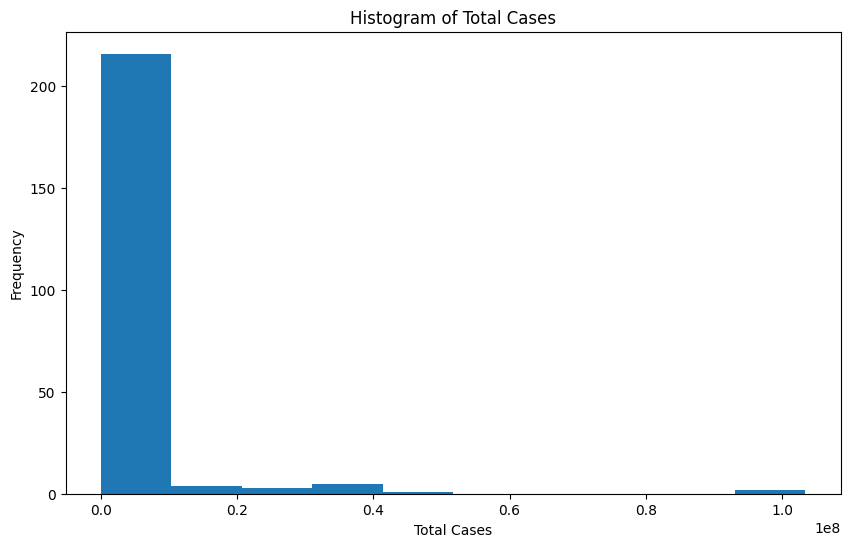

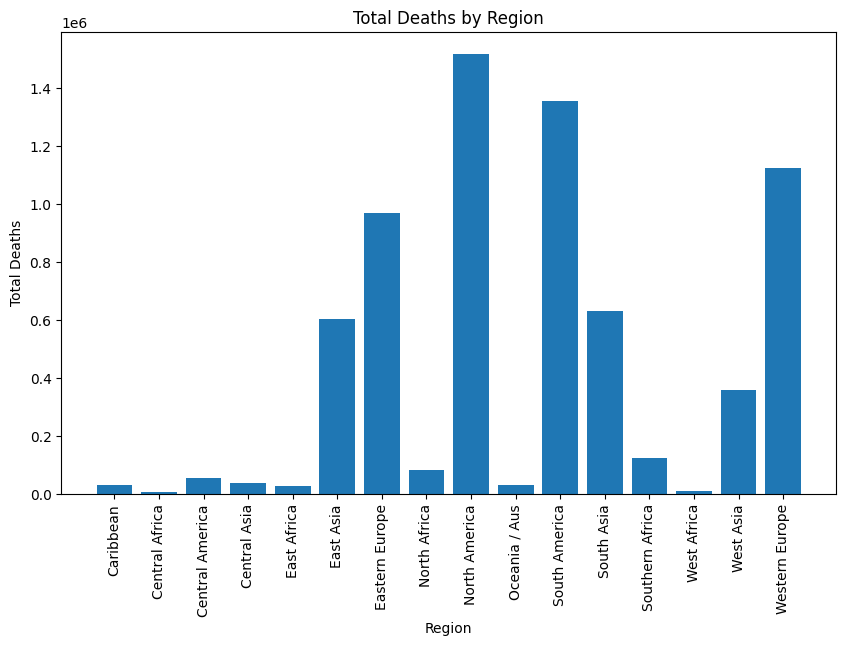

In [ ]:
covidtotalsdf.chat("Show information around the data.")

In [ ]:
covidtotalsdf.chat("Show first five rows.")

,lastdate,location,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds,vac_per_hund,aged_65_older,life_expectancy,hum_dev_ind,region
iso_code,,,,,,,,,,,,,,,,
AFG,2024-02-04,Afghanistan,231539.0,7982.0,5629.611,194.073,41128772,54.422,18.6,1803.987,0.50,NaN,2.581,64.83,0.511,South Asia
ALB,2024-01-28,Albania,334863.0,3605.0,117813.348,1268.331,2842318,104.871,38.0,11803.431,2.89,NaN,13.188,78.57,0.795,Eastern Europe
DZA,2023-12-03,Algeria,272010.0,6881.0,6057.694,153.241,44903228,17.348,29.1,13913.839,1.90,NaN,6.211,76.88,0.748,North Africa
ASM,2023-09-17,American Samoa,8359.0,34.0,188712.044,767.581,44295,278.205,NaN,NaN,NaN,NaN,NaN,73.74,NaN,Oceania / Aus
AND,2023-05-07,Andorra,48015.0,159.0,601367.684,1991.408,79843,163.755,NaN,NaN,NaN,NaN,NaN,83.73,0.868,Western Europe


In [ ]:
covidtotalsdf.chat("Show me locations with the five most total cases from highest to lowest and only show the first 4 columns")

,lastdate,location,total_cases,total_deaths
iso_code,,,,
USA,2023-05-14,United States,103436829.0,1127152.0
CHN,2024-02-04,China,99329249.0,121933.0
IND,2024-02-04,India,45026139.0,533454.0
FRA,2023-06-25,France,38997490.0,167985.0
DEU,2023-07-02,Germany,38437756.0,174979.0


In [ ]:
covidtotalsdf.chat("Show total cases pm, total deaths pm, and location for locations with the 10 highest total cases pm.")

,total_cases_pm,total_deaths_pm,location
iso_code,,,
BRN,763475.441,396.435,Brunei
CYP,760161.472,1523.426,Cyprus
SMR,750727.219,3739.982,San Marino
AUT,680262.588,2520.690,Austria
KOR,667207.062,693.495,South Korea
FRO,652484.139,527.138,Faeroe Islands
SVN,639407.730,4697.046,Slovenia
GIB,628882.700,3458.090,Gibraltar
MTQ,626793.139,3003.984,Martinique


In [ ]:
covidtotalsabb = covidtotalsdf.chat("Select total cases pm, total deaths pm, and location.")
type(covidtotalsabb)

{'type': 'dataframe', 'value':           total_cases_pm  total_deaths_pm           location
iso_code                                                    
AFG             5629.611          194.073        Afghanistan
ALB           117813.348         1268.331            Albania
DZA             6057.694          153.241            Algeria
ASM           188712.044          767.581     American Samoa
AND           601367.684         1991.408            Andorra
...                  ...              ...                ...
VNM           118386.518          440.039            Vietnam
WLF           306140.048          689.893  Wallis and Futuna
YEM              354.487           64.072              Yemen
ZMB            17449.783          203.270             Zambia
ZWE            16314.719          351.520           Zimbabwe

[231 rows x 3 columns]}


pandas.core.frame.DataFrame

In [ ]:
covidtotalsabb

,total_cases_pm,total_deaths_pm,location
iso_code,,,
AFG,5629.611,194.073,Afghanistan
ALB,117813.348,1268.331,Albania
DZA,6057.694,153.241,Algeria
ASM,188712.044,767.581,American Samoa
AND,601367.684,1991.408,Andorra
...,...,...,...
VNM,118386.518,440.039,Vietnam
WLF,306140.048,689.893,Wallis and Futuna
YEM,354.487,64.072,Yemen


In [ ]:
covidtotalsdf.chat("Show total cases pm and location where total cases pm greater than 95th percentile from the highest to the lowest total cases pm.")

,total_cases_pm,location
iso_code,,
BRN,763475.441,Brunei
CYP,760161.472,Cyprus
SMR,750727.219,San Marino
AUT,680262.588,Austria
KOR,667207.062,South Korea
FRO,652484.139,Faeroe Islands
SVN,639407.730,Slovenia
GIB,628882.700,Gibraltar
MTQ,626793.139,Martinique


In [ ]:
covidtotalsdf.chat("Summarize values for total cases pm and total deaths pm. Do not show any plots")

{'type': 'dataframe', 'value':        total_cases_pm  total_deaths_pm
count      231.000000       231.000000
mean    206177.794623      1261.778390
std     203858.096252      1314.981529
min        354.487000         0.000000
25%      21821.863000       141.177000
50%     133946.251000       827.046000
75%     345689.831000      1997.513000
max     763475.441000      6507.656000}


,total_cases_pm,total_deaths_pm
count,231.000000,231.000000
mean,206177.794623,1261.778390
std,203858.096252,1314.981529
min,354.487000,0.000000
25%,21821.863000,141.177000
50%,133946.251000,827.046000
75%,345689.831000,1997.513000
max,763475.441000,6507.656000


In [ ]:
covidtotalsdf.chat("Show sum of total cases and total deaths by region and rank by total death.")

,region,total_cases,total_deaths,rank
8,North America,115917286.0,1516239.0,1.0
10,South America,68751186.0,1354440.0,2.0
15,Western Europe,189405185.0,1124545.0,3.0
6,Eastern Europe,62360832.0,969011.0,4.0
11,South Asia,51507806.0,632374.0,5.0
5,East Asia,205704775.0,604355.0,6.0
14,West Asia,41080675.0,360258.0,7.0
12,Southern Africa,5627277.0,126376.0,8.0
7,North Africa,3727507.0,83872.0,9.0
2,Central America,4285644.0,54500.0,10.0


In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000 

In [ ]:
irisdf = SmartDataframe(df, config={"llm": llm, "temperature": 0, "verbose": False, "output_type": "plot", "custom_whitelisted_dependencies":["scikit-learn","statsmodels"], "enable_cache": True, "use_error_correction_framework": False})

In [ ]:
irisdf.chat("Calaculate mean and median values of all numeric columns.")

,Mean,Median
sepal length (cm),5.843333,5.80
sepal width (cm),3.057333,3.00
petal length (cm),3.758000,4.35
petal width (cm),1.199333,1.30


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


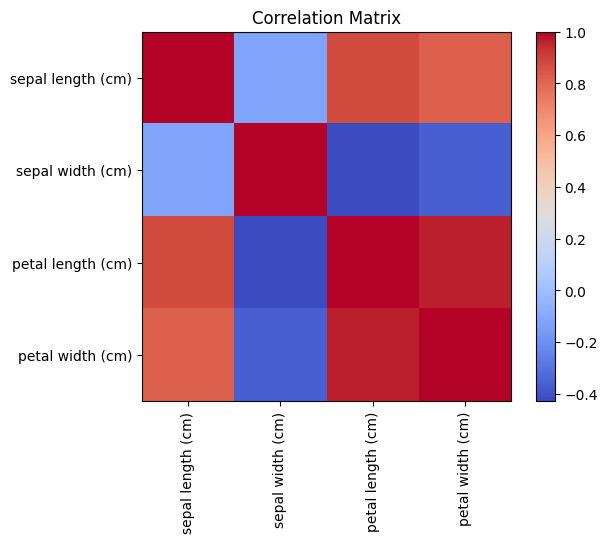

In [ ]:
irisdf.chat("Calculate correlations between all columns and don't use yellow color")

In [ ]:
irisdf.chat("Calculate correlation between sepal length and petal width.")

0.8179411262715757

In [ ]:
# install module yfinance (yahoo finance)
try:
  import yfinance
except ModuleNotFoundError:
  if 'google.colab' in str(get_ipython()):
    %pip install yfinance

'Microsoft stock price increased by -4.07% in the first quarter of 2025.'

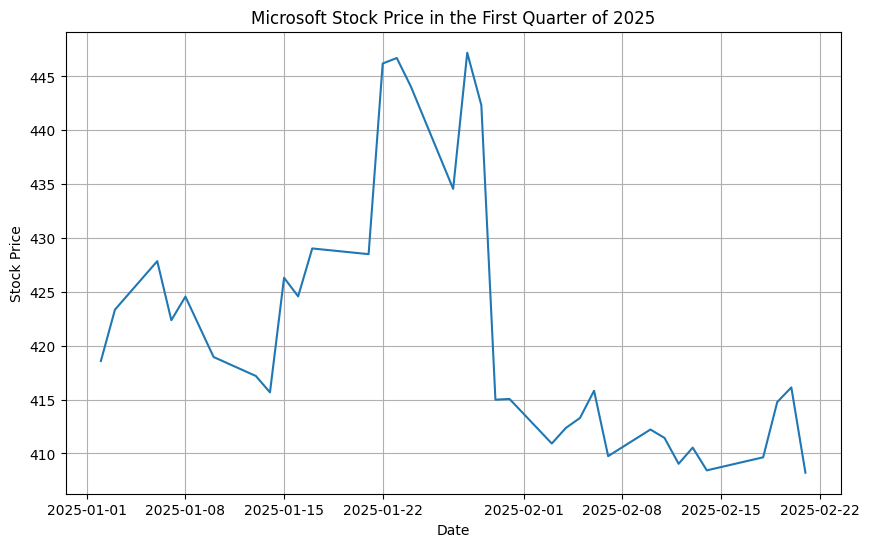

In [ ]:
from pandasai.connectors import YahooFinanceConnector

yf_conn = YahooFinanceConnector("MSFT")

ydf = SmartDataframe(yf_conn, config={"llm": llm, "temperature": 0, "verbose": False, "output_type": "plot", "custom_whitelisted_dependencies":["scikit-learn","statsmodels"], "enable_cache": True, "use_error_correction_framework": False})
ydf.chat("How did Microsoft stock perform in first quarter of 2025?")